In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('spam.csv')

In [10]:
df.sample(5)

,Category,Message
2206,ham,"Haha, my legs and neck are killing me and my a..."
1077,ham,Where can download clear movies. Dvd copies.
2047,ham,"Aight fuck it, I'll get it later"
5510,ham,I went to project centre
1925,ham,Ok


In [11]:
df.shape

(5572, 2)

In [12]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preproccesing
# 4. Model Builduing
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. DATA CLEANING

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['Category'] = encoder.fit_transform(df['Category'])

In [16]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [18]:
# check for duplicate values

In [19]:
df.duplicated().sum()

415

In [20]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5157, 2)

# 1. Exploratory Data Analysis EDA

In [23]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

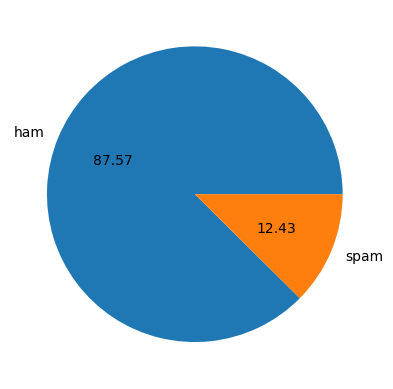

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
# data is imbalanced


In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters'] = df['Message'].apply(len)

In [30]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# ham
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#spam
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

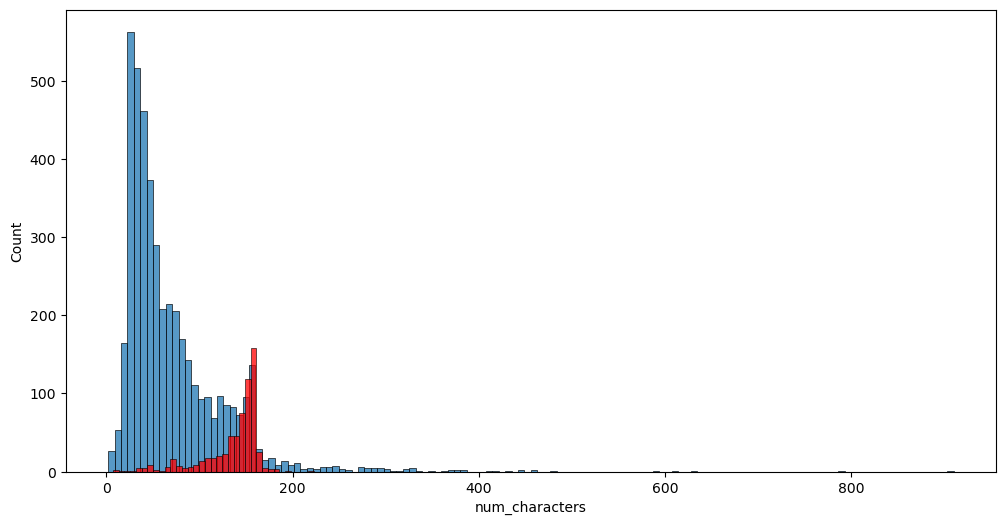

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

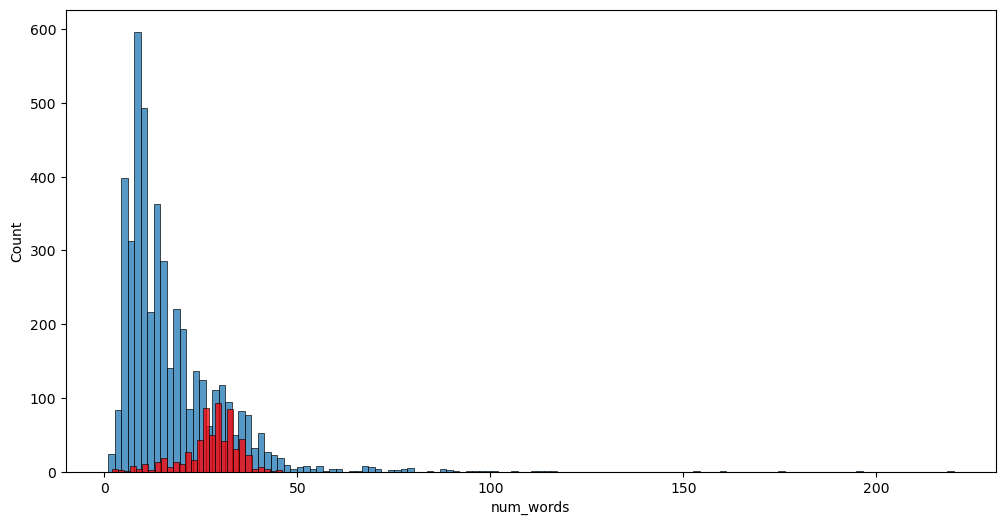

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'],color='red')

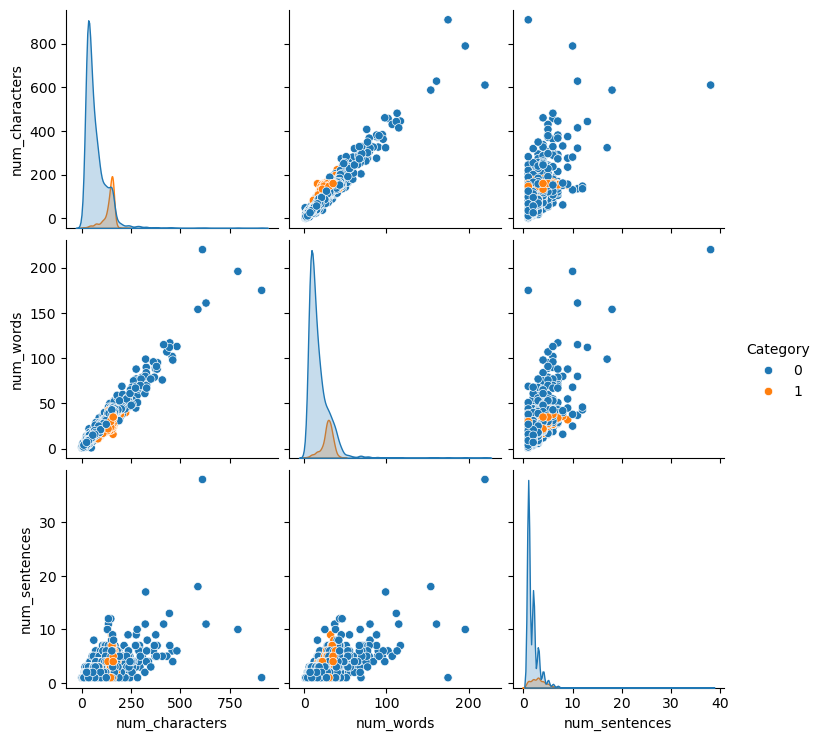

In [41]:
sns.pairplot(df,hue='Category')

 # 3. Data Preprocessing


In [42]:
# 1.Lower case
# 2.Tokenization
# 3.Removing special characters
# 4.Removing stop words and punctuation
# 5.Stemming

In [43]:
from nltk.stem import PorterStemmer

In [44]:
ps = PorterStemmer()

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [49]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [51]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

# 4. Model Building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
X=df['Message']
y=df['Category']

In [56]:
X.shape

(5157,)

In [57]:
y.shape

(5157,)

In [59]:
df.isnull().sum()

Category            0
Message             0
num_characters      0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

In [60]:
cv=CountVectorizer()

In [61]:
X=cv.fit_transform(X)

In [62]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [63]:
x_train.shape

(4125, 8709)

In [64]:
x_test.shape

(1032, 8709)

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
model = MultinomialNB()

In [69]:
model.fit(x_train, y_train)

MultinomialNB()

In [70]:
model.score(x_test, y_test)

0.9689922480620154

In [72]:
msg="You Won 1000$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [73]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
import pickle
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))

In [76]:
import pickle
pickle.dump(cv, open('vec.pkl','wb'))
